In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
 # Import dataset
file_path = "/content/drive/MyDrive/UoB Datasets/housing_zoopla_dec_jan.csv"
df = pd.read_csv(file_path, sep='\t')

# 1. Initial Exploration and Pre-processing

### check first few rows of dataset

In [4]:
df.head()

,filename,rooms,isRetirementHome,isSharedOwnership,listingCondition,location,numBaths,numRecepts,outcode,postTownName,propertyType,tenure,ditsnace_to_school,ditsnace_to_train,text_description,features,price
0,62560735.html,3,False,False,pre-owned,Swillington,1.0,1.0,LS26,Leeds,detached,freehold,0.1,1.2,"'Summary Guide Price £290,000 - £300,000 This ...","'Guide Price £290,000 - £300,000 + Detached Fa...",290000
1,63504402.html,1,False,False,pre-owned,Horsforth,1.0,1.0,LS18,Leeds,terraced,freehold,0.4,0.5,'Ideal 1st home or investment! Spacious one do...,'Council Tax - A. EPC - C + Rare &amp; excitin...,160000
2,62183278.html,4,False,False,pre-owned,Huddersfield,3.0,2.0,HD5,Huddersfield,detached,freehold,0.3,0.3,'Dwellings Estate Agents are delighted to pres...,'A private cul-de-sac of only three homes + De...,295000
3,63414112.html,2,False,False,pre-owned,Stanningley,1.0,1.0,LS28,Pudsey,semi_detached,NaN,0.1,0.2,"'Situated within a superb corner plot, tucked ...",'',235000
4,62822840.html,5,False,False,pre-owned,Guiseley,4.0,5.0,LS20,Leeds,end_terrace,freehold,0.1,0.3,Summary A great opportunity for investors and ...,'Great investment oppportunity + Unique &amp; ...,350000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            5609 non-null   object 
 1   rooms               5609 non-null   int64  
 2   isRetirementHome    5609 non-null   bool   
 3   isSharedOwnership   5609 non-null   bool   
 4   listingCondition    5609 non-null   object 
 5   location            5609 non-null   object 
 6   numBaths            5352 non-null   float64
 7   numRecepts          5257 non-null   float64
 8   outcode             5609 non-null   object 
 9   postTownName        5496 non-null   object 
 10  propertyType        5464 non-null   object 
 11  tenure              4494 non-null   object 
 12  ditsnace_to_school  5609 non-null   float64
 13  ditsnace_to_train   5609 non-null   float64
 14  text_description    5609 non-null   object 
 15  features            5609 non-null   object 
 16  price 

### Convert the datatypes for "numBaths" and "numRecepts" from float to int64 because number of bathrooms and receptions cannot be float; convert "isRetirementHome" and "isSharedOwnership" from bool to object.

In [6]:
df['numBaths'] = df['numBaths'].astype('Int64')
df['numRecepts'] = df['numRecepts'].astype('Int64')
df['isRetirementHome'] = df['isRetirementHome'].astype('object')
df['isSharedOwnership'] = df['isSharedOwnership'].astype('object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5609 entries, 0 to 5608
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            5609 non-null   object 
 1   rooms               5609 non-null   int64  
 2   isRetirementHome    5609 non-null   object 
 3   isSharedOwnership   5609 non-null   object 
 4   listingCondition    5609 non-null   object 
 5   location            5609 non-null   object 
 6   numBaths            5352 non-null   Int64  
 7   numRecepts          5257 non-null   Int64  
 8   outcode             5609 non-null   object 
 9   postTownName        5496 non-null   object 
 10  propertyType        5464 non-null   object 
 11  tenure              4494 non-null   object 
 12  ditsnace_to_school  5609 non-null   float64
 13  ditsnace_to_train   5609 non-null   float64
 14  text_description    5609 non-null   object 
 15  features            5609 non-null   object 
 16  price 

In [8]:
df.describe()

,rooms,numBaths,numRecepts,ditsnace_to_school,ditsnace_to_train,price
count,5609.000000,5352.0,5257.0,5609.000000,5609.000000,5.609000e+03
mean,2.948832,1.534006,1.524824,0.259832,0.448975,2.808081e+05
std,1.201692,0.788846,0.74625,0.165293,0.257144,2.114629e+05
min,1.000000,1.0,1.0,0.000000,0.000000,3.500000e+03
25%,2.000000,1.0,1.0,0.100000,0.300000,1.450000e+05
50%,3.000000,1.0,1.0,0.200000,0.400000,2.300000e+05
75%,4.000000,2.0,2.0,0.300000,0.500000,3.599950e+05
max,6.000000,7.0,8.0,1.700000,2.200000,4.000000e+06


### check for duplicates and missing values (NaN, None or other null values)

In [9]:
df.duplicated().any()

np.False_

In [10]:
df.isna().sum()

,0
filename,0
rooms,0
isRetirementHome,0
isSharedOwnership,0
listingCondition,0
location,0
numBaths,257
numRecepts,352
outcode,0
postTownName,113


As seen above, there are some missing values in numBaths, numRecepts, postTownName, propertyType and tenure.

In [11]:
unique_towns = df['postTownName'].unique()
print(unique_towns)

['Leeds' 'Huddersfield' 'Pudsey' nan 'Bradford' 'Bingley' 'Wakefield'
 'Ilkley' 'Otley' 'Keighley' 'Ossett' 'Normanton' 'Mirfield' 'Cleckheaton'
 'Holmfirth' 'Shipley' 'Halifax' 'Elland' 'Brighouse' 'Heckmondwike'
 'Batley' 'Sowerby Bridge' 'Dewsbury' 'Hebden Bridge' 'Todmorden'
 'Liversedge' 'Harrogate' 'Manchester']


In [12]:
unique_towns = df['propertyType'].unique()
print(unique_towns)

['detached' 'terraced' 'semi_detached' 'end_terrace' 'flat' 'town_house'
 'detached_bungalow' 'bungalow' nan 'terraced_bungalow' 'mews'
 'semi_detached_bungalow' 'block_of_flats' 'link_detached' 'cottage'
 'country_house' 'maisonette' 'park_home' 'barn_conversion' 'land' 'lodge'
 'chalet' 'parking' 'farmhouse' 'retail']


### Feature creation:
- To create a new feature "MetBoroughs" from "outcode" that groups "postTownName" into metropolitan boroughs, which would improve interpretability of visualisations.
- To group "propertyType" values into broader, logical categories to reduce clutter and improve interpretability in plots.


In [13]:
# Defining a function to map outcode prefixes to MetBoroughs

def map_outcode_to_metborough(outcode):
    if outcode.startswith("WF"):
        return "Wakefield"
    elif outcode.startswith("HD"):
        return "Kirklees"
    elif outcode.startswith("HX"):
        return "Calderdale"
    elif outcode.startswith("BD"):
        return "Bradford"
    elif outcode.startswith("LS"):
        return "Leeds"
    else:
        return None

In [14]:
 # Create the new column "MetBoroughs" using the apply function
df['MetBoroughs'] = df['outcode'].apply(map_outcode_to_metborough)

In [15]:
# grouping propertyType
property_type_mapping = {
    'detached': 'House',
    'semi_detached': 'House',
    'end_terrace': 'House',
    'terraced': 'House',
    'town_house': 'House',
    'mews': 'House',
    'link_detached': 'House',

    'flat': 'Flat',
    'block_of_flats': 'Flat',
    'maisonette': 'Flat',

    'bungalow': 'Bungalow',
    'detached_bungalow': 'Bungalow',
    'semi_detached_bungalow': 'Bungalow',
    'terraced_bungalow': 'Bungalow',

    'park_home': 'Mobile Home',
    'lodge': 'Mobile Home',
    'chalet': 'Mobile Home',

    'cottage': 'Country Home',
    'country_house': 'Country Home',
    'farmhouse': 'Country Home',

    'barn_conversion': 'Converted Property',

    'land': 'Non-Residential',
    'parking': 'Non-Residential',
    'retail': 'Non-Residential',
}


In [16]:
# Apply the mapping
df['propertyGroup'] = df['propertyType'].map(property_type_mapping)
df['propertyGroup'] = df['propertyGroup'].fillna('Unknown')

In [18]:
unique_metboroughs = df['MetBoroughs'].unique()
print(unique_metboroughs)

['Leeds' 'Kirklees' 'Bradford' 'Wakefield' 'Calderdale' None]


In [19]:
unique_propertyGroup = df['propertyGroup'].unique()
print(unique_propertyGroup)

['House' 'Flat' 'Bungalow' 'Unknown' 'Country Home' 'Mobile Home'
 'Converted Property' 'Non-Residential']


In [20]:
df_new = df[['filename', 'rooms', 'isRetirementHome', 'isSharedOwnership', 'listingCondition', 'location',
             'numBaths', 'numRecepts', 'outcode', 'postTownName', 'MetBoroughs', 'propertyType',
             'propertyGroup', 'tenure', 'ditsnace_to_school', 'ditsnace_to_train', 'text_description', 'features', 'price']]

# Exploratory Data Analysis

### Numerical Data

In [21]:
# Create a new dataframe with only numerical features for further statistical analysis or visualisation
num_data = df_new.select_dtypes(exclude="object")
num_data.head()

,rooms,numBaths,numRecepts,ditsnace_to_school,ditsnace_to_train,price
0,3,1,1,0.1,1.2,290000
1,1,1,1,0.4,0.5,160000
2,4,3,2,0.3,0.3,295000
3,2,1,1,0.1,0.2,235000
4,5,4,5,0.1,0.3,350000


In [22]:
# assign numerical columns
num_column = num_data.columns
print(num_column)

Index(['rooms', 'numBaths', 'numRecepts', 'ditsnace_to_school',
       'ditsnace_to_train', 'price'],
      dtype='object')


### Categorical Data

In [23]:
# Create a new dataframe with only categorical features for further statistical analysis or visualisation
cat_columns = ['MetBoroughs', 'isRetirementHome', 'isSharedOwnership', 'listingCondition','propertyGroup', 'tenure']
cat_data = df_new[cat_columns]

## Univariate Analysis

Text(0.5, 1.0, 'Count of Houses by Number of Rooms')

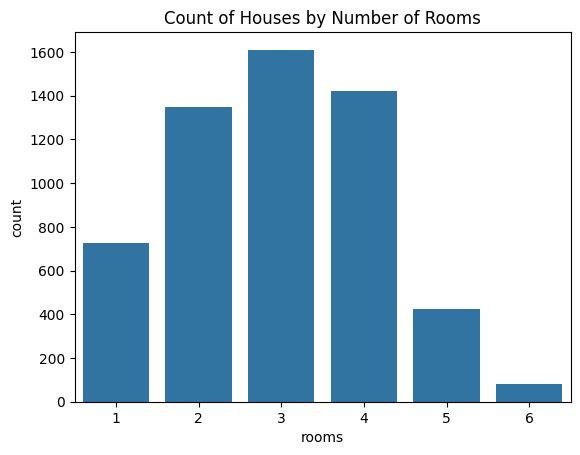

In [24]:
sns.countplot(x='rooms', data=df)
plt.title("Count of Houses by Number of Rooms")

Text(0.5, 1.0, 'Count of Bathrooms per House')

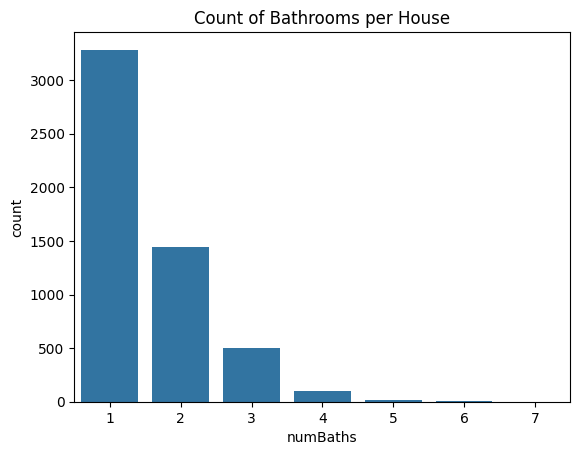

In [25]:
sns.countplot(x='numBaths', data=df)
plt.title("Count of Bathrooms per House")

Text(0.5, 1.0, 'Distribution of Number of Receptions')

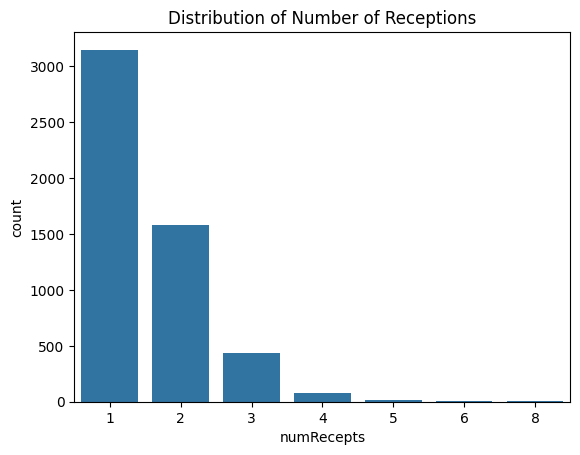

In [27]:
sns.countplot(x='numRecepts', data=df)
plt.title("Distribution of Number of Receptions")

Text(0.5, 1.0, 'Distribution of Distance to Nearest School')

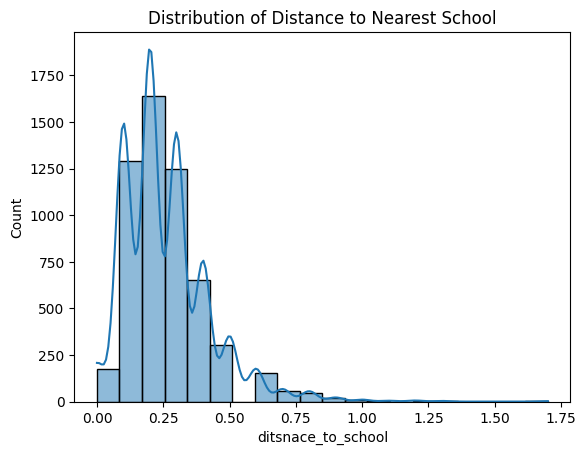

In [28]:
sns.histplot(df['ditsnace_to_school'], bins=20, kde=True)
plt.title("Distribution of Distance to Nearest School")

Text(0.5, 1.0, 'Distance to Train Station')

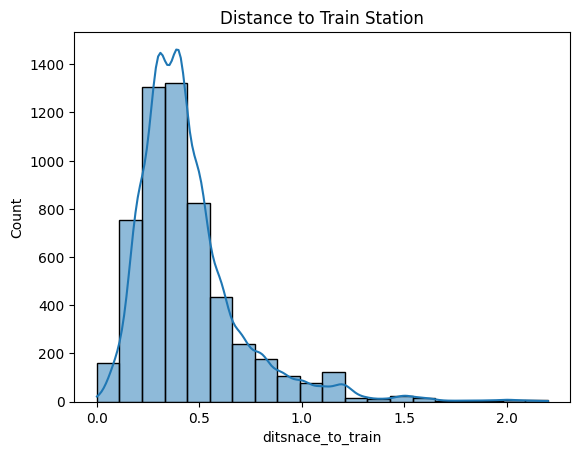

In [29]:
sns.histplot(df['ditsnace_to_train'], bins=20, kde=True)
plt.title("Distance to Train Station")

Text(0.5, 1.0, 'Distribution of House Prices')

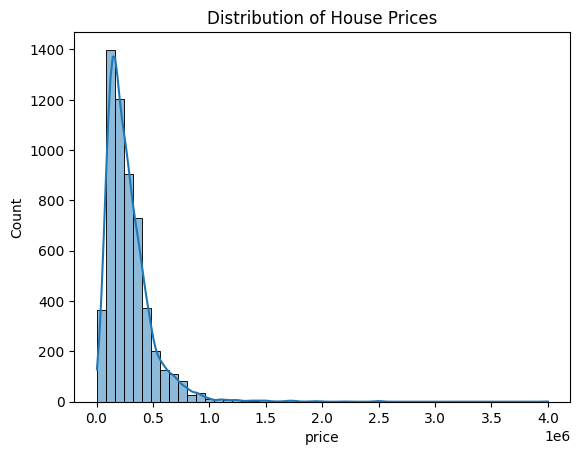

In [30]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")

In [ ]:
#ns.histplot(np.log1p(df['price']), bins=50, kde=True)
#plt.title("Log-Transformed House Prices")

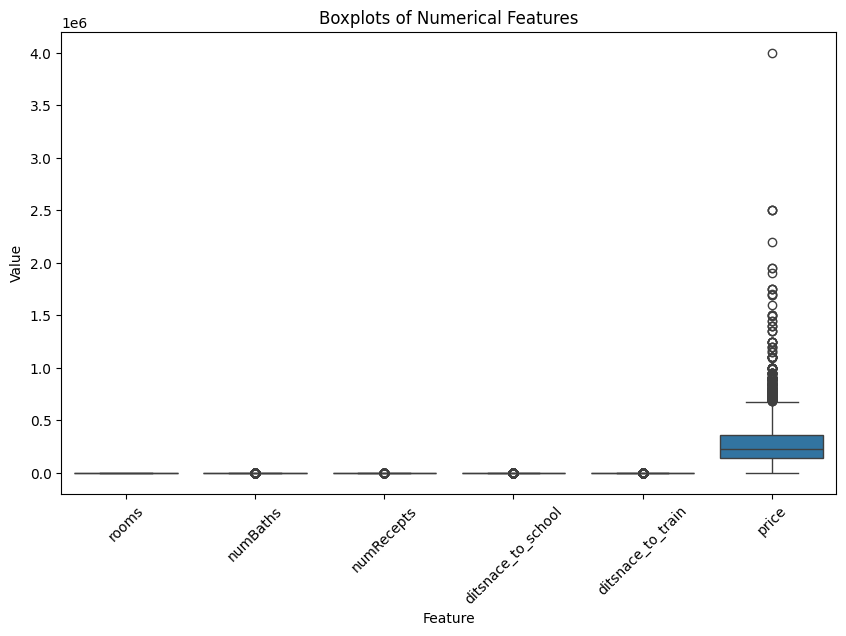

In [31]:
melted = df[num_column].melt(var_name='Feature', value_name='Value')
plt.figure(figsize=(10, 6))
sns.boxplot(x='Feature', y='Value', data=melted)
plt.title("Boxplots of Numerical Features")
plt.xticks(rotation=45)
plt.show()

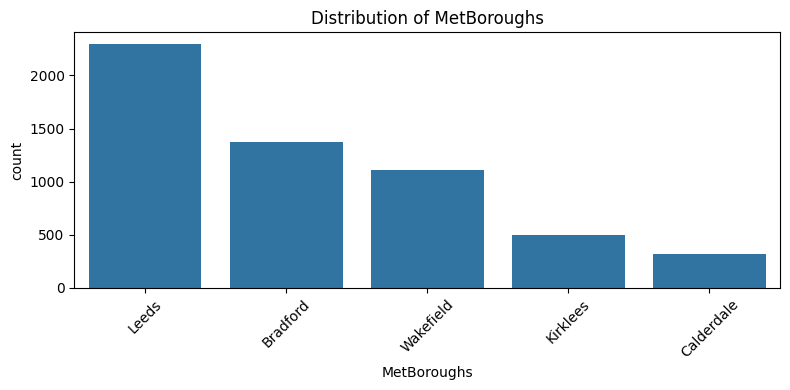

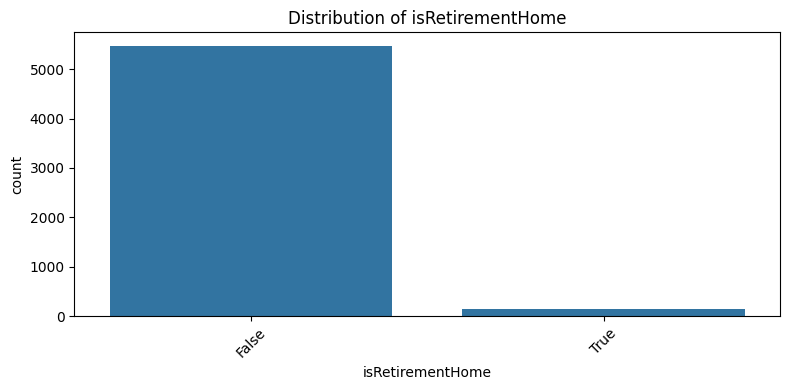

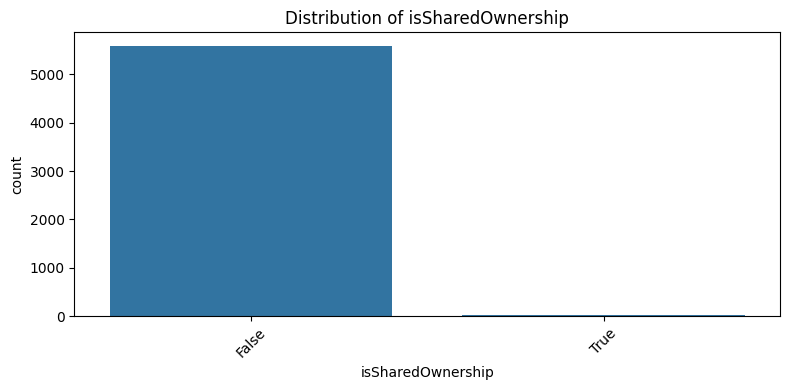

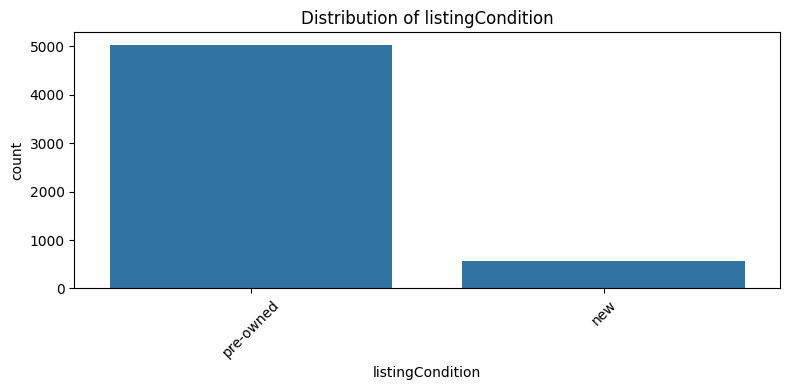

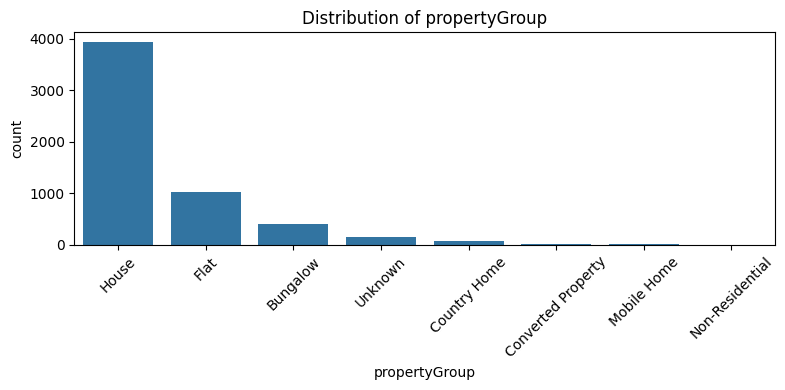

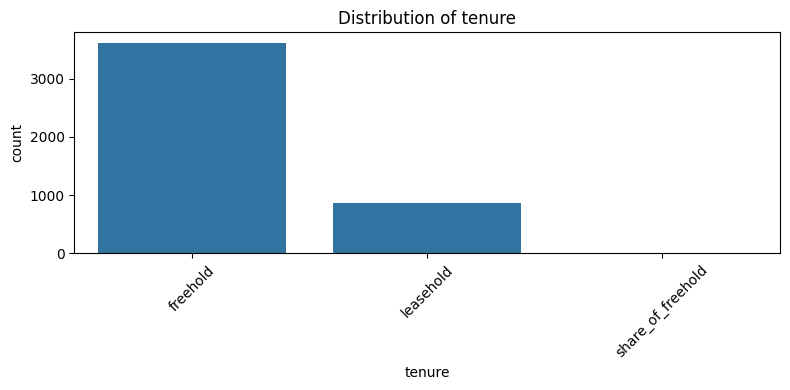

In [32]:
# Plots for categorical features

for col in cat_columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=cat_data, x=col, order=cat_data[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


## Bivariate Analysis

### Numerical vs Numerical

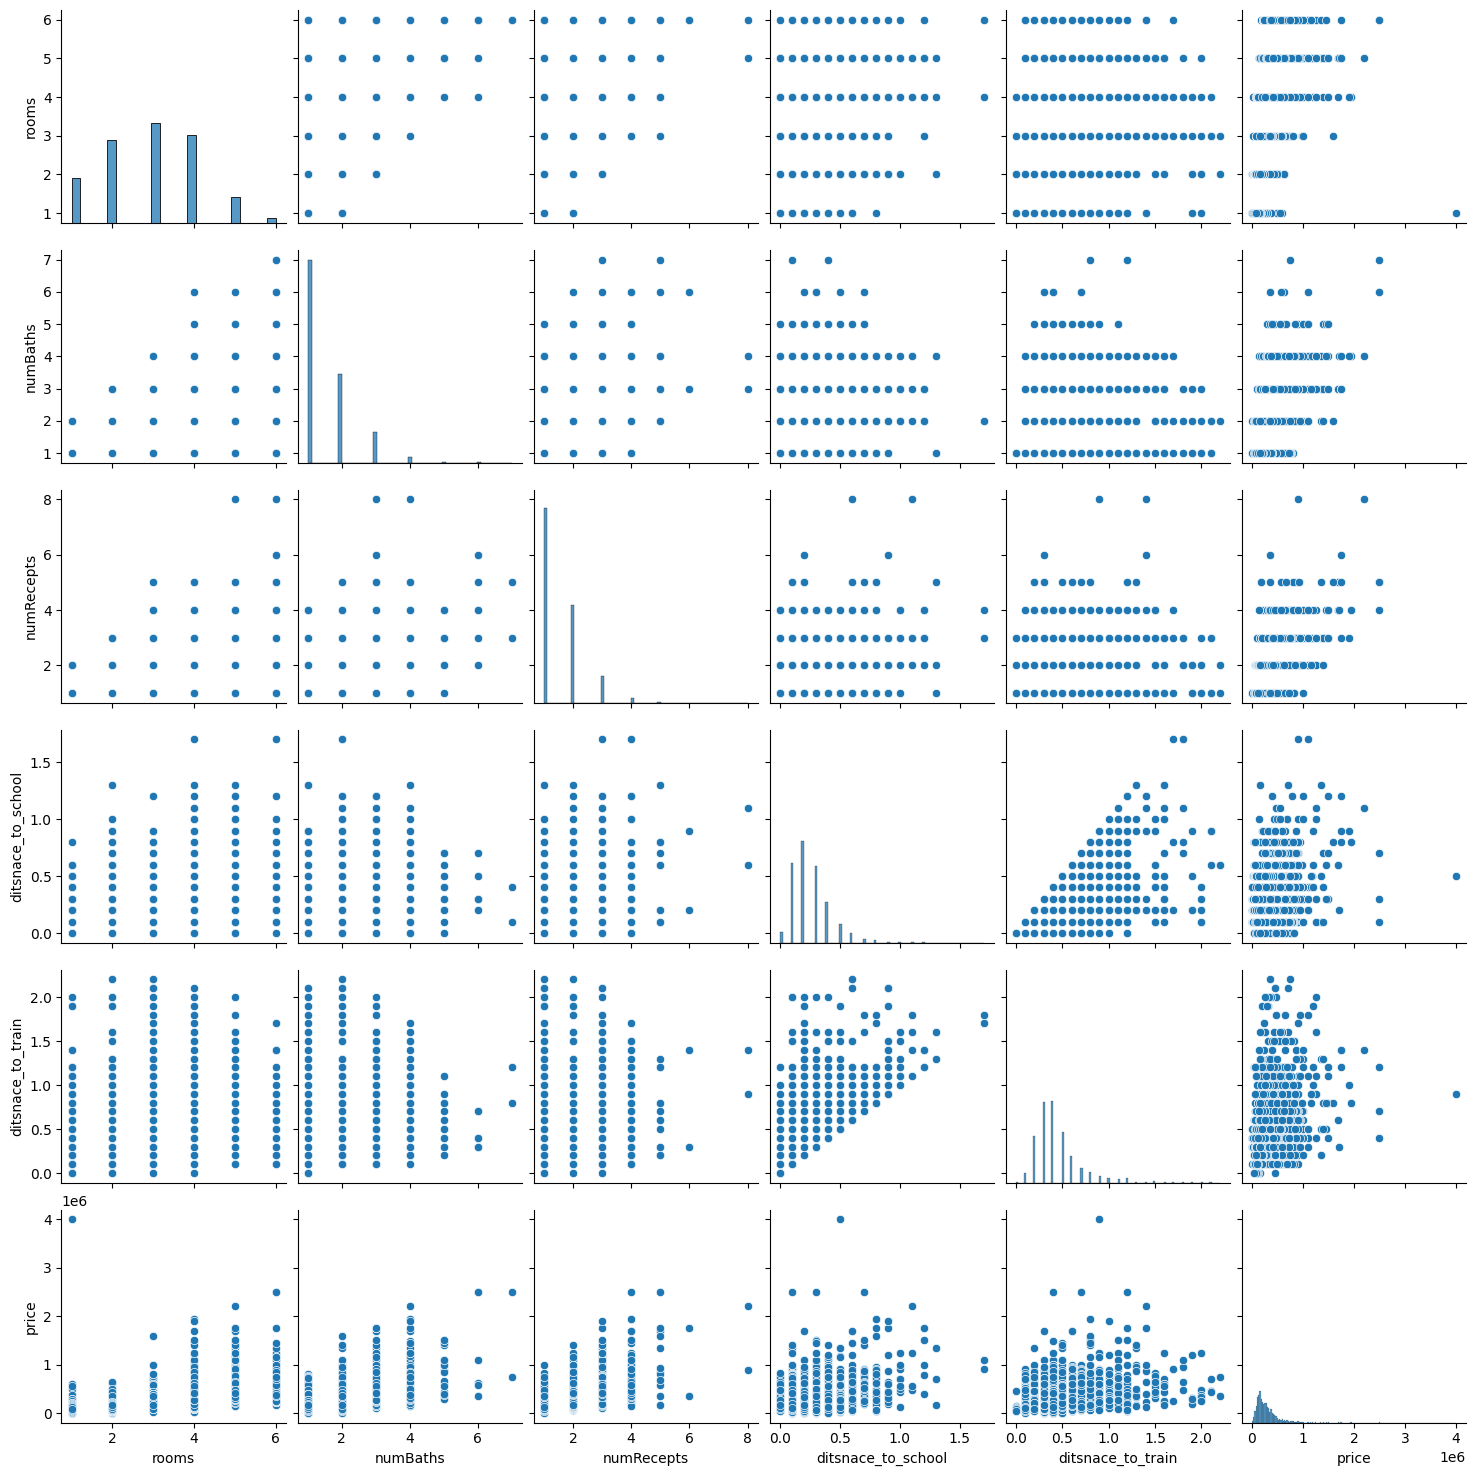

In [33]:
sns.pairplot(df[num_column])

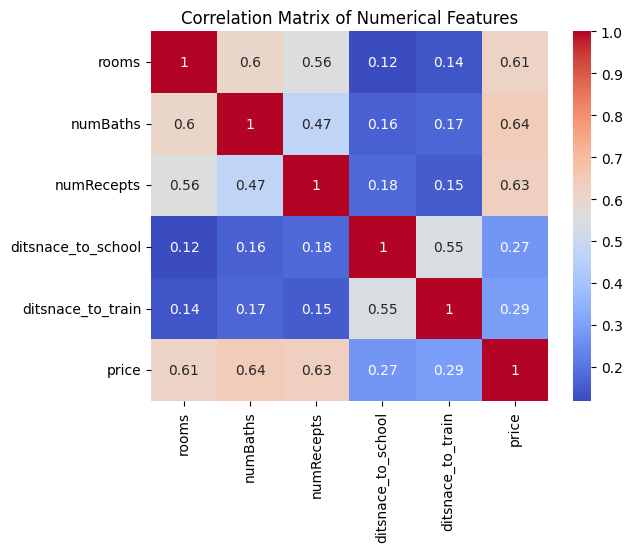

In [34]:
num_data = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(num_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### Categorical vs Numerical

<Axes: xlabel='tenure', ylabel='price'>

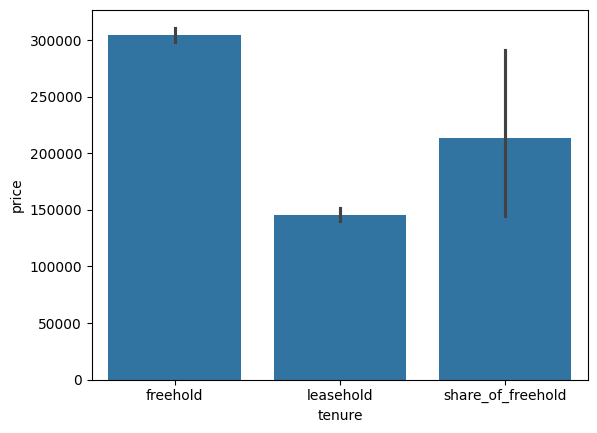

In [35]:
sns.barplot(data=df, x='tenure', y='price')

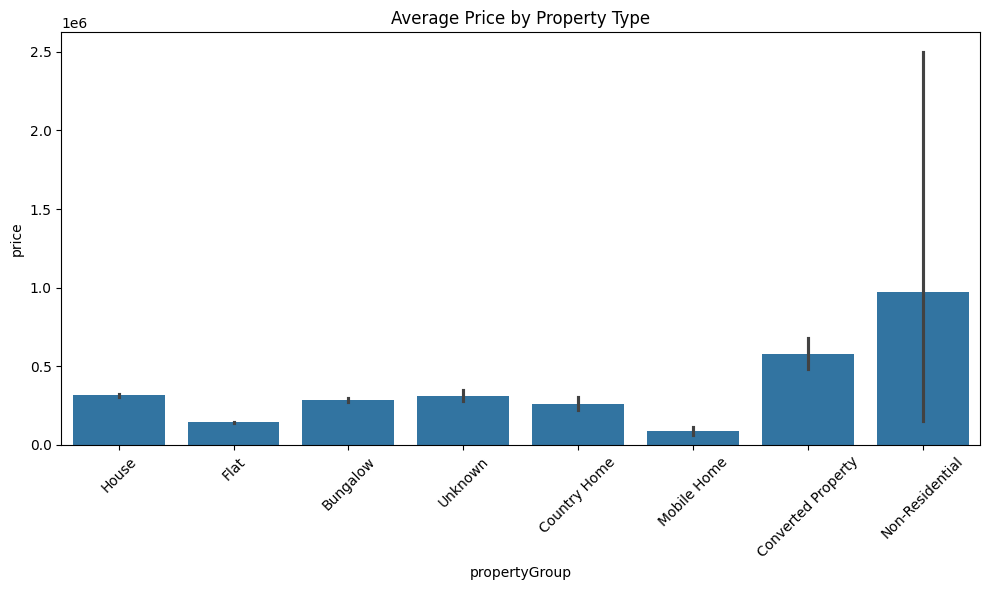

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='propertyGroup', y='price', estimator='mean')  # Optional: specify estimator
plt.xticks(rotation=45)
plt.title('Average Price by Property Type')
plt.tight_layout()
plt.show()

<Axes: xlabel='listingCondition', ylabel='price'>

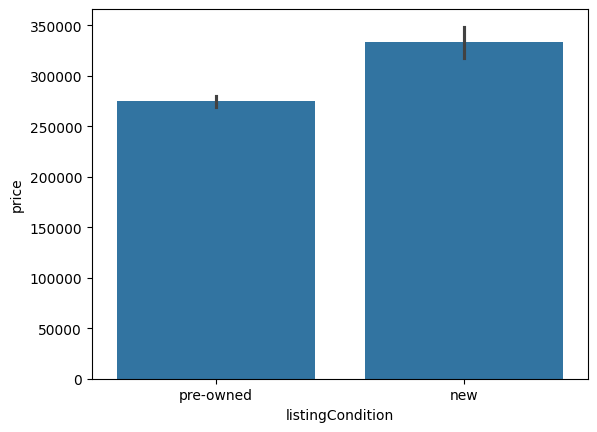

In [37]:
sns.barplot(data=df, x='listingCondition', y='price')

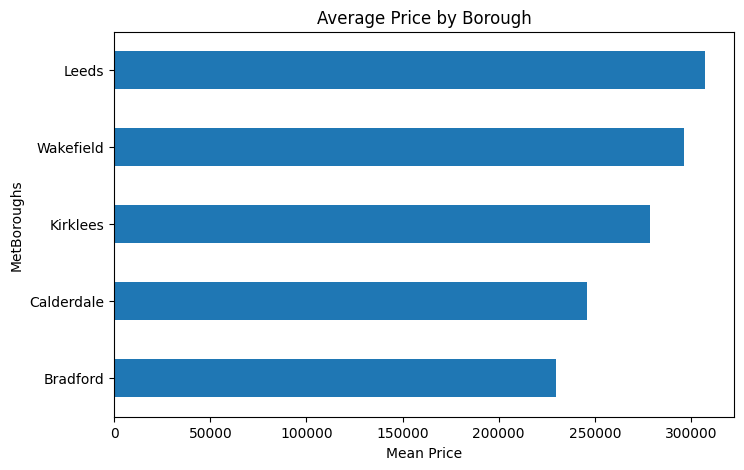

In [38]:
df_new.groupby('MetBoroughs')['price'].mean().sort_values().plot(kind='barh', figsize=(8,5))
plt.title('Average Price by Borough')
plt.xlabel('Mean Price')
plt.show()

### Categorical vs Categorical

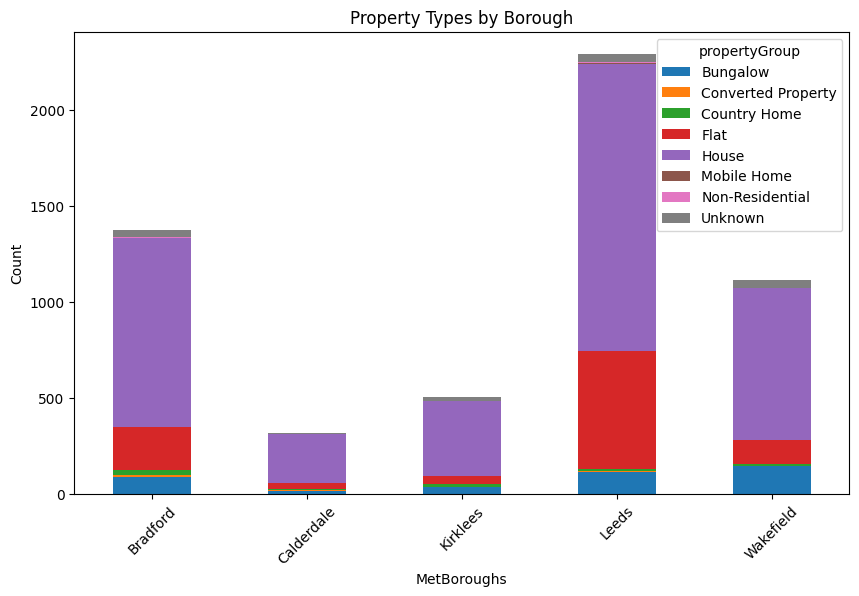

In [39]:
pd.crosstab(df_new['MetBoroughs'], df_new['propertyGroup']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Property Types by Borough')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

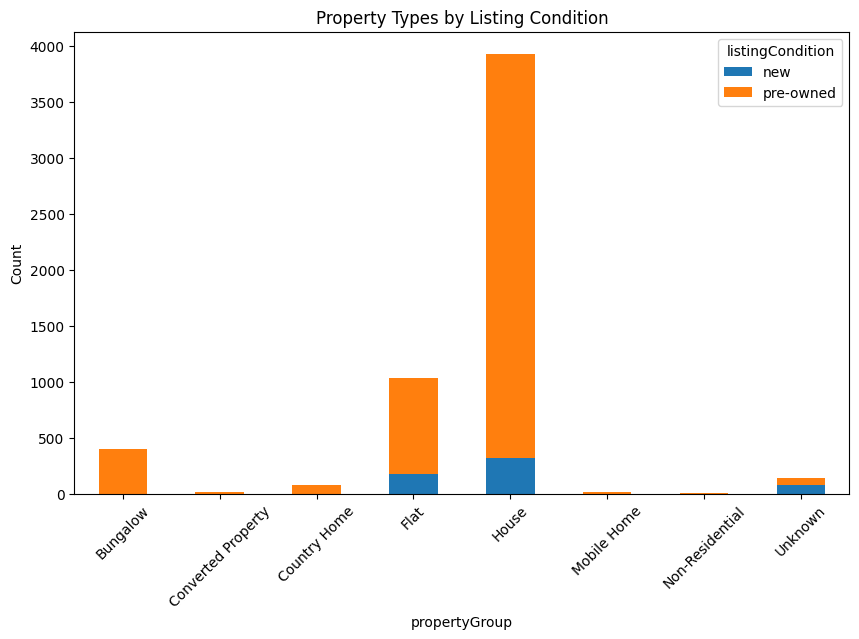

In [40]:
pd.crosstab(df_new['propertyGroup'], df_new['listingCondition']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Property Types by Listing Condition')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

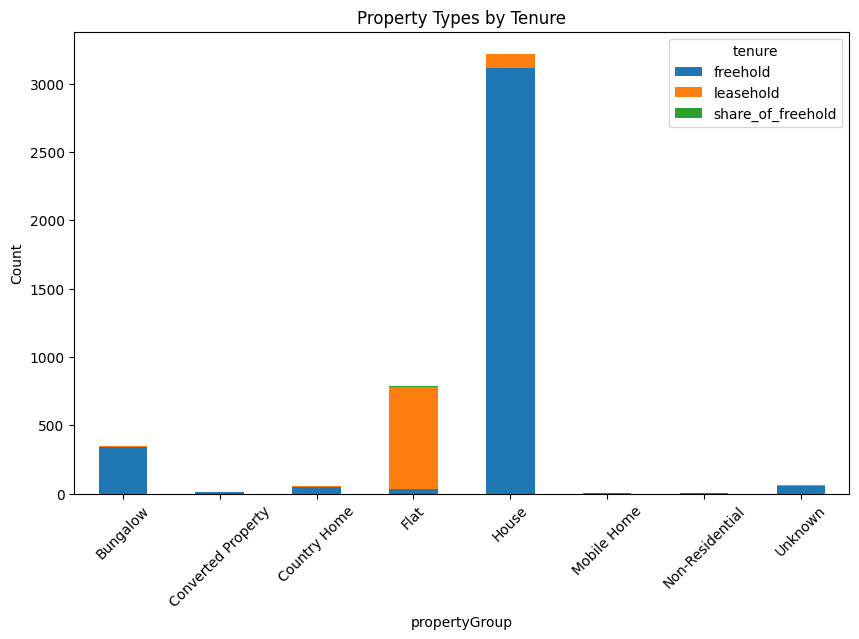

In [41]:
pd.crosstab(df_new['propertyGroup'], df_new['tenure']).plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Property Types by Tenure')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Preprocessing after Exploratory Data Analysis

###Dropping features that are neither important nor relevant for the analysis.

The following features will be dropped: "filename","location", "outcode", "postTownName", "text_description", "features". Note that "postTownName", "location" and "outcode" are dropped because a new feature "MetBoroughs" has been created.

In [42]:
df_new = df_new.drop(['filename', 'location', 'outcode', 'postTownName', 'propertyType', 'text_description', 'features'], axis=1)

In [45]:
df_new.head()

,rooms,isRetirementHome,isSharedOwnership,listingCondition,numBaths,numRecepts,MetBoroughs,propertyGroup,tenure,ditsnace_to_school,ditsnace_to_train,price
0,3,False,False,pre-owned,1,1,Leeds,House,freehold,0.1,1.2,290000
1,1,False,False,pre-owned,1,1,Leeds,House,freehold,0.4,0.5,160000
2,4,False,False,pre-owned,3,2,Kirklees,House,freehold,0.3,0.3,295000
3,2,False,False,pre-owned,1,1,Leeds,House,NaN,0.1,0.2,235000
4,5,False,False,pre-owned,4,5,Leeds,House,freehold,0.1,0.3,350000


### Handling Missing Values

First, I checked the proportion of missing values in the features with missing values to know how they will be handled (whether to be removed or replaced).

Having done that:
- I am going to drop the null values in "MetBoroughs" because they are insignificant.
- I am going to replace the nulls in "numBaths", "numRecepts", and "tenure" as removing them will significantly affect the data size.

In [47]:
# Drop rows with null values in 'MetBoroughs'
df_new.dropna(subset=['MetBoroughs'], inplace=True)

In [ ]:
# Replace null values in 'numBaths' and 'numRecepts' with the median values
median_numBaths = df['numBaths'].median()
median_numRecepts = df['numRecepts'].median()
df_new['numBaths'].fillna(median_numBaths, inplace=True)
df_new['numRecepts'].fillna(median_numRecepts, inplace=True)

In [50]:
# Replace null values in 'tenure' based on the proportion. Calculate the proportions of each category.

tenure_proportions = df_new['tenure'].value_counts(normalize=True)
null_count = df_new['tenure'].isnull().sum()
null_replacements = np.random.choice(tenure_proportions.index, size=null_count, p=tenure_proportions.values)
df_new.loc[df_new['tenure'].isnull(), 'tenure'] = null_replacements

In [51]:
df_new.isna().sum()

,0
rooms,0
isRetirementHome,0
isSharedOwnership,0
listingCondition,0
numBaths,0
numRecepts,0
MetBoroughs,0
propertyGroup,0
tenure,0
ditsnace_to_school,0


In [52]:
# save the preprocessed dataframe df_new as csv
df_new.to_csv("preprocessed_zoopla.csv", index=False)